In [4]:
import pandas as pd

# Load dataset (include the folder name)
df = pd.read_excel("data set raw/online_retail_II.xlsx")

# See first few rows
df.head()



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [2]:
import os

# Show the current working directory (where Jupyter is running)
os.getcwd()


'C:\\Users\\jackl\\Documents\\DATA ANALYSIS\\PORTFOLIO\\ecommerce python project'

In [5]:
# Get a quick summary of the data
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [6]:
df.columns = ['Invoice', 'StockCode', 'Description', 'Quantity', 
              'InvoiceDate', 'Price', 'CustomerID', 'Country']


In [7]:
# Remove any invoices that start with 'C' (these are cancellations)
df = df[~df['Invoice'].astype(str).str.startswith('C')]

# Keep only positive quantity and price
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]


In [8]:
df = df.dropna(subset=['CustomerID'])


In [9]:
df['Sales'] = df['Quantity'] * df['Price']



In [10]:
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
Index: 407664 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407664 non-null  object        
 1   StockCode    407664 non-null  object        
 2   Description  407664 non-null  object        
 3   Quantity     407664 non-null  int64         
 4   InvoiceDate  407664 non-null  datetime64[ns]
 5   Price        407664 non-null  float64       
 6   CustomerID   407664 non-null  float64       
 7   Country      407664 non-null  object        
 8   Sales        407664 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.1+ MB


,Quantity,InvoiceDate,Price,CustomerID,Sales
count,407664.000000,407664,407664.000000,407664.000000,407664.000000
mean,13.585585,2010-07-01 10:15:11.871688192,3.294438,15368.592598,21.664909
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000,0.001000
25%,2.000000,2010-03-26 14:01:00,1.250000,13997.000000,4.950000
50%,5.000000,2010-07-09 15:47:00,1.950000,15321.000000,11.900000
75%,12.000000,2010-10-14 17:09:00,3.750000,16812.000000,19.500000
max,19152.000000,2010-12-09 20:01:00,10953.500000,18287.000000,15818.400000
std,96.840747,NaN,34.757965,1679.762138,77.150058


In [11]:
top_countries = (
    df.groupby('Country')['Sales']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)
top_countries


Country
United Kingdom    7414755.963
EIRE               356085.210
Netherlands        268786.000
Germany            202395.321
France             146215.420
Sweden              53171.390
Denmark             50906.850
Spain               47601.420
Switzerland         43921.390
Australia           31446.800
Name: Sales, dtype: float64

In [12]:
top_products = (
    df.groupby('Description')['Sales']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)
top_products


Description
WHITE HANGING HEART T-LIGHT HOLDER     151624.31
REGENCY CAKESTAND 3 TIER               143893.35
Manual                                  98560.64
ASSORTED COLOUR BIRD ORNAMENT           70493.83
JUMBO BAG RED RETROSPOT                 51759.30
POSTAGE                                 48741.08
ROTATING SILVER ANGELS T-LIGHT HLDR     40186.65
PAPER CHAIN KIT 50'S CHRISTMAS          36933.50
PARTY BUNTING                           35035.90
EDWARDIAN PARASOL NATURAL               34044.75
Name: Sales, dtype: float64

C:\Users\jackl\AppData\Local\Temp\ipykernel_8804\446125387.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['Sales']


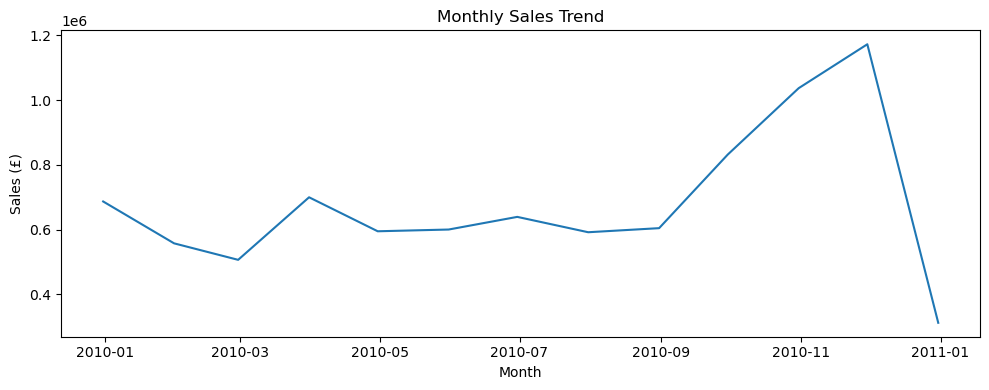

In [13]:
monthly_sales = (
    df.set_index('InvoiceDate')
      .resample('M')['Sales']
      .sum()
      .reset_index()
)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(monthly_sales['InvoiceDate'], monthly_sales['Sales'])
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales (£)')
plt.tight_layout()
plt.show()


In [14]:
print("Top 10 countries by sales:\n", top_countries)
print("\nTop 10 products by sales:\n", top_products)


Top 10 countries by sales:
 Country
United Kingdom    7414755.963
EIRE               356085.210
Netherlands        268786.000
Germany            202395.321
France             146215.420
Sweden              53171.390
Denmark             50906.850
Spain               47601.420
Switzerland         43921.390
Australia           31446.800
Name: Sales, dtype: float64

Top 10 products by sales:
 Description
WHITE HANGING HEART T-LIGHT HOLDER     151624.31
REGENCY CAKESTAND 3 TIER               143893.35
Manual                                  98560.64
ASSORTED COLOUR BIRD ORNAMENT           70493.83
JUMBO BAG RED RETROSPOT                 51759.30
POSTAGE                                 48741.08
ROTATING SILVER ANGELS T-LIGHT HLDR     40186.65
PAPER CHAIN KIT 50'S CHRISTMAS          36933.50
PARTY BUNTING                           35035.90
EDWARDIAN PARASOL NATURAL               34044.75
Name: Sales, dtype: float64


C:\Users\jackl\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted sales for next month: £ 808407.93


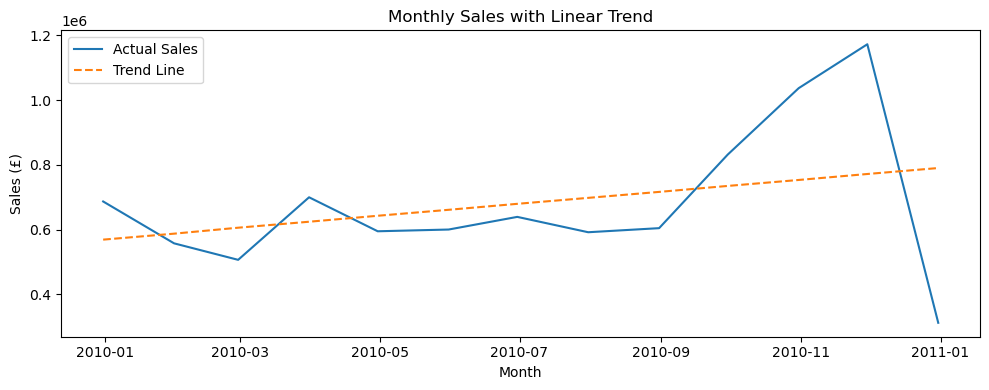

In [15]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare monthly sales data again (just in case)
monthly_sales = (
    df.set_index('InvoiceDate')
      .resample('ME')['Sales']   # use 'ME' instead of 'M' to remove the warning
      .sum()
      .reset_index()
)

# Add a time index
monthly_sales['t'] = np.arange(len(monthly_sales))

# Train simple linear regression
X = monthly_sales[['t']]
y = monthly_sales['Sales']
model = LinearRegression()
model.fit(X, y)

# Predict next month (t = N)
next_t = np.array([[len(monthly_sales)]])
next_month_sales = model.predict(next_t)[0]
print("Predicted sales for next month: £", round(next_month_sales, 2))

# Plot with trend line
monthly_sales['Predicted'] = model.predict(X)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(monthly_sales['InvoiceDate'], monthly_sales['Sales'], label='Actual Sales')
plt.plot(monthly_sales['InvoiceDate'], monthly_sales['Predicted'], label='Trend Line', linestyle='--')
plt.title('Monthly Sales with Linear Trend')
plt.xlabel('Month'); plt.ylabel('Sales (£)')
plt.legend(); plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
import numpy as np

# Group by each customer
customer_df = (
    df.groupby('CustomerID')
      .agg({
          'Invoice': 'nunique',          # number of orders
          'Quantity': 'sum',             # total quantity bought
          'Sales': 'sum',                # total spend
          'InvoiceDate': 'max'           # most recent purchase date
      })
      .rename(columns={
          'Invoice': 'NumOrders',
          'Quantity': 'TotalQuantity',
          'Sales': 'TotalSales',
          'InvoiceDate': 'LastPurchaseDate'
      })
      .reset_index()
)

# Calculate "Recency" = days since last purchase
latest_date = df['InvoiceDate'].max()
customer_df['RecencyDays'] = (latest_date - customer_df['LastPurchaseDate']).dt.days

# Drop date column (we have Recency now)
customer_df = customer_df.drop(columns=['LastPurchaseDate'])

customer_df.head()


,CustomerID,NumOrders,TotalQuantity,TotalSales,RecencyDays
0,12346.0,11,70,372.86,164
1,12347.0,2,828,1323.32,2
2,12348.0,1,373,222.16,73
3,12349.0,3,993,2671.14,42
4,12351.0,1,261,300.93,10


In [17]:
# Compute median sales to define threshold
threshold = customer_df['TotalSales'].median()

# Create target variable
customer_df['HighValue'] = (customer_df['TotalSales'] > threshold).astype(int)

customer_df['HighValue'].value_counts()


HighValue
0    2156
1    2156
Name: count, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

# Features and target
X = customer_df[['NumOrders', 'TotalQuantity', 'TotalSales', 'RecencyDays']]
y = customer_df['HighValue']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict
y_pred_log = log_model.predict(X_test)

# Evaluate
print("🔹 Logistic Regression Results")
print("Accuracy:", round(accuracy_score(y_test, y_pred_log), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


🔹 Logistic Regression Results
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       424
           1       1.00      1.00      1.00       439

    accuracy                           1.00       863
   macro avg       1.00      1.00      1.00       863
weighted avg       1.00      1.00      1.00       863


Confusion Matrix:
 [[424   0]
 [  0 439]]


In [20]:
from sklearn.ensemble import RandomForestClassifier

# Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("🔹 Random Forest Results")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


🔹 Random Forest Results
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       424
           1       1.00      1.00      1.00       439

    accuracy                           1.00       863
   macro avg       1.00      1.00      1.00       863
weighted avg       1.00      1.00      1.00       863


Confusion Matrix:
 [[424   0]
 [  0 439]]


TotalSales       0.627595
TotalQuantity    0.298362
NumOrders        0.072771
RecencyDays      0.001272
dtype: float64


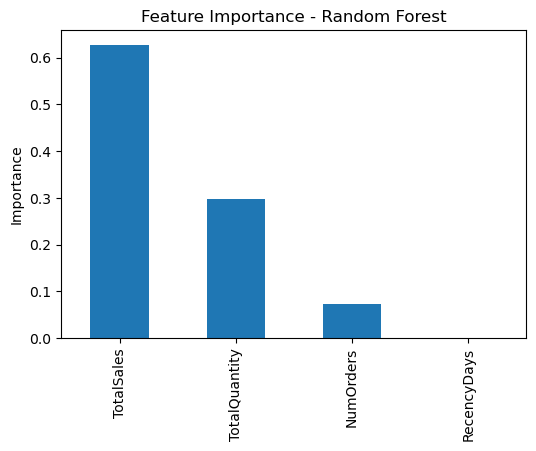

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importance)

plt.figure(figsize=(6,4))
importance.plot(kind='bar')
plt.title('Feature Importance - Random Forest')
plt.ylabel('Importance')
plt.show()


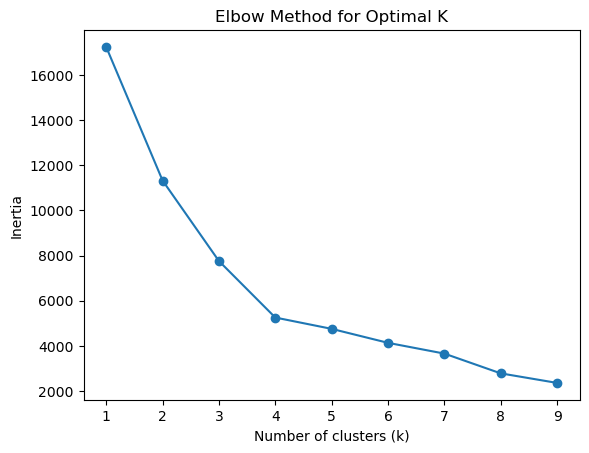

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features (no target)
X_cluster = customer_df[['NumOrders', 'TotalQuantity', 'TotalSales', 'RecencyDays']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Find optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [23]:
# Let’s assume 4 clusters (adjust if elbow suggests otherwise)
kmeans = KMeans(n_clusters=4, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Check sample output
customer_df.groupby('Cluster').mean()


,CustomerID,NumOrders,TotalQuantity,TotalSales,RecencyDays,HighValue
Cluster,,,,,,
0,15329.907644,4.556630,997.549454,1733.228876,41.741654,0.590016
1,15407.123574,1.654943,313.783270,563.223892,241.355513,0.199620
2,14901.833333,95.500000,136469.333333,185302.268333,48.333333,1.000000
3,15430.224490,46.836735,24332.489796,32095.501694,17.204082,1.000000


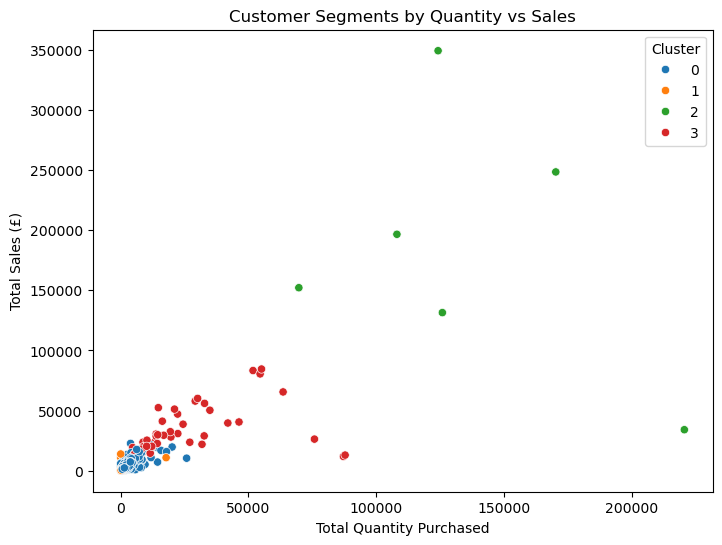

In [24]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x='TotalQuantity', y='TotalSales', hue='Cluster', data=customer_df, palette='tab10')
plt.title('Customer Segments by Quantity vs Sales')
plt.xlabel('Total Quantity Purchased')
plt.ylabel('Total Sales (£)')
plt.show()


C:\Users\jackl\AppData\Local\Temp\ipykernel_8804\4106695659.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['Sales'].sum().reset_index()


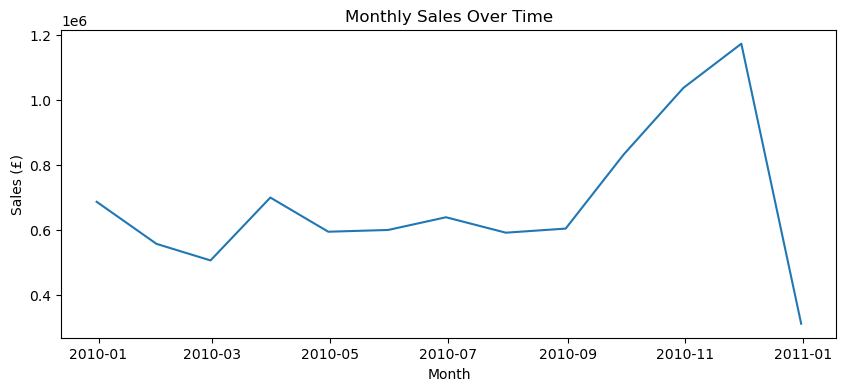

In [25]:
# Aggregate sales monthly
monthly_sales = df.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['Sales'].sum().reset_index()

# Plot to visualize trend
plt.figure(figsize=(10,4))
plt.plot(monthly_sales['InvoiceDate'], monthly_sales['Sales'])
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales (£)')
plt.show()


In [26]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Set index
ts = monthly_sales.set_index('InvoiceDate')['Sales']

# Fit ARIMA model (auto parameters can be tuned)
model = ARIMA(ts, order=(1,1,1))
results = model.fit()

# Forecast next 6 months
forecast = results.forecast(steps=6)
print("📈 Forecasted Sales (£):")
print(forecast)


📈 Forecasted Sales (£):
2011-01-31    568200.540105
2011-02-28    638759.474178
2011-03-31    658182.515068
2011-04-30    663529.173466
2011-05-31    665000.969576
2011-06-30    665406.116797
Freq: ME, Name: predicted_mean, dtype: float64


C:\Users\jackl\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\jackl\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\jackl\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\jackl\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jackl\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA param

C:\Users\jackl\AppData\Local\Temp\ipykernel_8804\5524830.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(ts.index[-1], periods=7, freq='M')[1:], forecast, label='Forecast', linestyle='--')


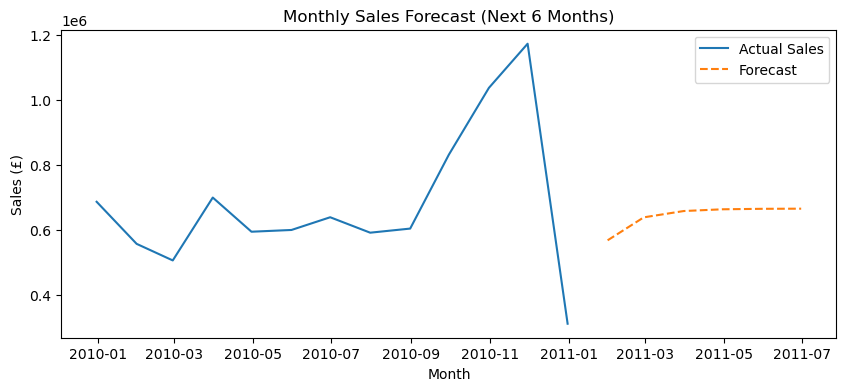

In [27]:
plt.figure(figsize=(10,4))
plt.plot(ts, label='Actual Sales')
plt.plot(pd.date_range(ts.index[-1], periods=7, freq='M')[1:], forecast, label='Forecast', linestyle='--')
plt.title('Monthly Sales Forecast (Next 6 Months)')
plt.xlabel('Month')
plt.ylabel('Sales (£)')
plt.legend()
plt.show()


In [28]:
import pandas as pd
from datetime import datetime

# Use latest date in dataset as reference
reference_date = df['InvoiceDate'].max()

# Compute RFM metrics per customer
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'Invoice': 'nunique',  # Frequency
    'Sales': 'sum'  # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,164,11,372.86
1,12347.0,2,2,1323.32
2,12348.0,73,1,222.16
3,12349.0,42,3,2671.14
4,12351.0,10,1,300.93


In [31]:
# --- Robust RFM scoring using ranks (avoids duplicate-bin errors) ---

# Recency: lower is better → give recent buyers higher scores
rfm['R_Score'] = pd.qcut(
    rfm['Recency'].rank(method='first', ascending=True),  # recent (small) → small rank
    5, labels=[5,4,3,2,1]  # invert labels so recent = 5
).astype(int)

# Frequency & Monetary: higher is better → higher score
rfm['F_Score'] = pd.qcut(
    rfm['Frequency'].rank(method='first'),
    5, labels=[1,2,3,4,5]
).astype(int)

rfm['M_Score'] = pd.qcut(
    rfm['Monetary'].rank(method='first'),
    5, labels=[1,2,3,4,5]
).astype(int)

# Combine
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score']   = rfm[['R_Score','F_Score','M_Score']].sum(axis=1)

rfm.head()



,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
0,12346.0,164,11,372.86,2,5,2,252,9
1,12347.0,2,2,1323.32,5,2,4,524,11
2,12348.0,73,1,222.16,2,1,1,211,4
3,12349.0,42,3,2671.14,3,3,5,335,11
4,12351.0,10,1,300.93,5,1,2,512,8


In [32]:
def rfm_segment(score):
    if score >= 12:
        return 'Champions'
    elif score >= 9:
        return 'Loyal Customers'
    elif score >= 6:
        return 'Potential Loyalist'
    elif score >= 4:
        return 'At Risk'
    else:
        return 'Lost'

rfm['Segment'] = rfm['RFM_Score'].apply(rfm_segment)

# quick summary table
rfm.groupby('Segment').agg(
    Customers=('CustomerID','count'),
    AvgMonetary=('Monetary','mean')
).sort_values('AvgMonetary', ascending=False)


,Customers,AvgMonetary
Segment,,
Champions,1207,5477.043702
Loyal Customers,1075,1307.590560
Potential Loyalist,1109,544.075971
At Risk,719,254.836734
Lost,202,143.286188


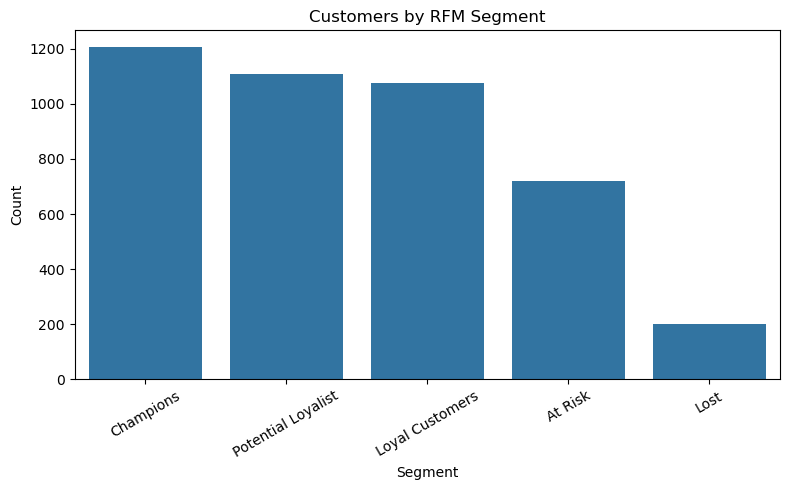

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='Segment', data=rfm, order=rfm['Segment'].value_counts().index)
plt.title('Customers by RFM Segment')
plt.xlabel('Segment'); plt.ylabel('Count'); plt.xticks(rotation=30)
plt.tight_layout(); plt.show()
